<a href="https://colab.research.google.com/github/silwalprabin/data-mining-and-machine-learning/blob/main/W1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Example: Load Iris dataset and perform Exploratory Data Analysis(EDA)**


In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Quick look
print(df.head())

# Summary statistics
print(df.describe())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  


# Workshop: Loading the Iris Dataset The Iris

Dataset Classic dataset for classification - 150 samples of iris flowers with 4 features each

Dataset Features: Sepal Length (cm), Sepal Width (cm), Petal Length (cm), Petal Width (cm)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Dataset shape: (150, 6)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.4358

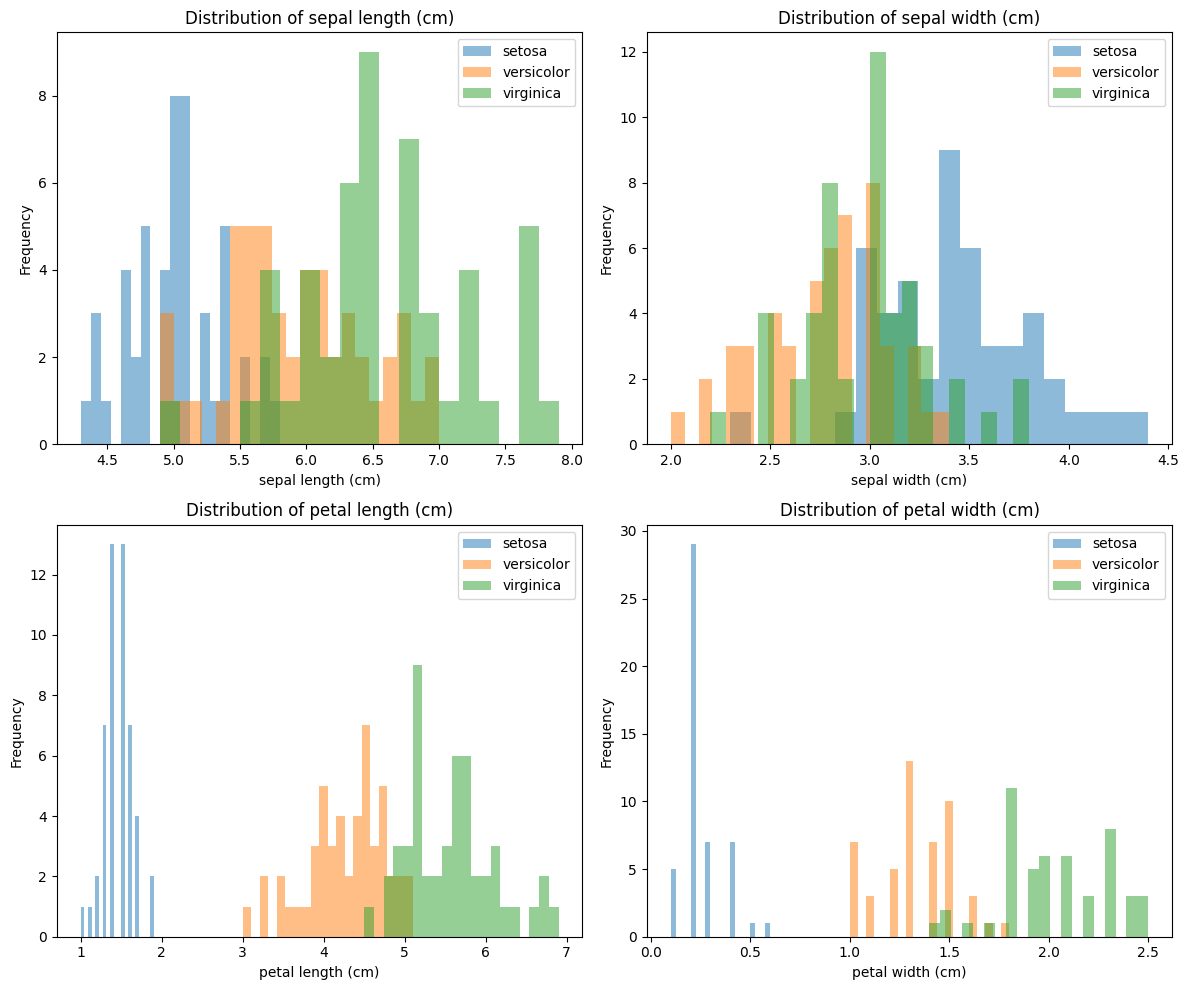

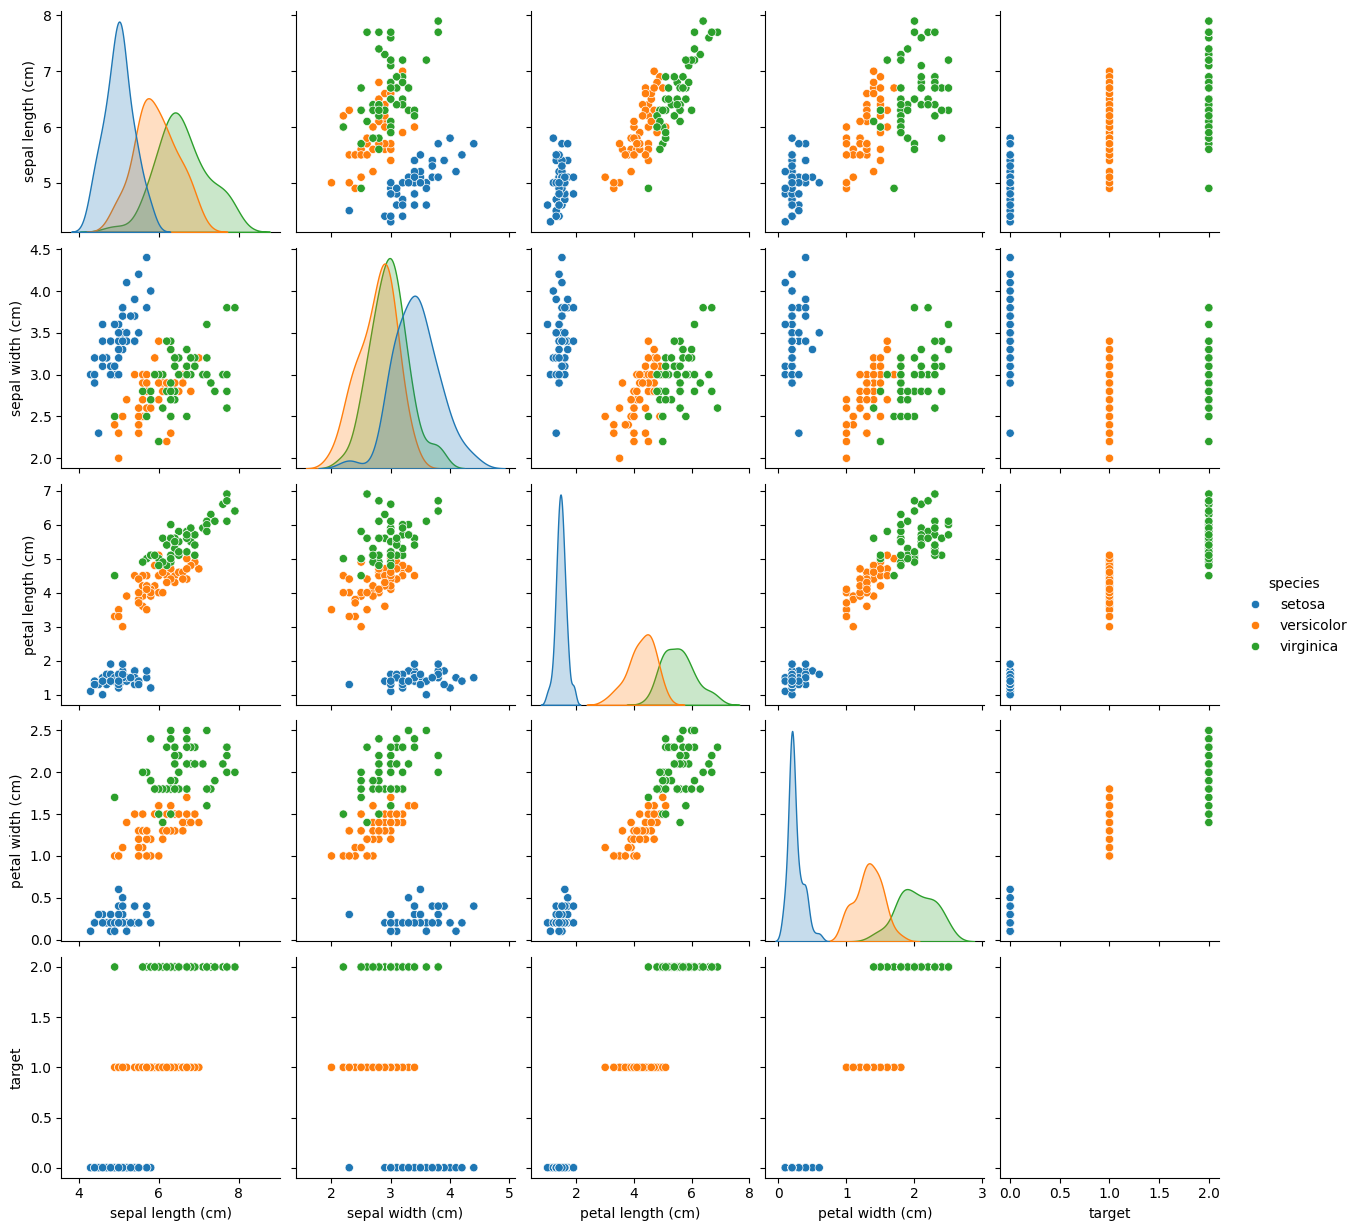

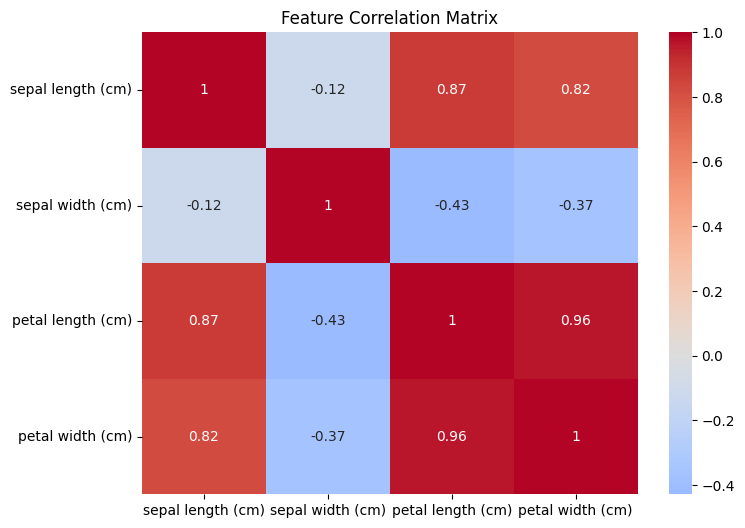

Training set size: (120, 4)
Test set size: (30, 4)

Before scaling - Training data statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count             120.00            120.00             120.00   
mean                5.84              3.05               3.77   
std                 0.84              0.45               1.77   
min                 4.30              2.00               1.10   
25%                 5.10              2.80               1.60   
50%                 5.75              3.00               4.25   
75%                 6.40              3.32               5.10   
max                 7.90              4.40               6.90   

       petal width (cm)  
count            120.00  
mean               1.20  
std                0.76  
min                0.10  
25%                0.30  
50%                1.30  
75%                1.80  
max                2.50  

After scaling - Training data statistics:
       sepal length (cm)  sepal width (cm)

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()

# Create DataFrame for easier manipulation
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display first few rows
print(df.head())
print(f"\nDataset shape: {df.shape}")
print(f"Features: {iris.feature_names}")
print(f"Target classes: {iris.target_names}")

# Basic statistics
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())

# Class distribution
print("\nClass distribution:")
print(df['species'].value_counts())

# Correlation matrix
correlation_matrix = df.drop(['target', 'species'], axis=1).corr()

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# Distribution plots
for idx, col in enumerate(df.columns[:4]):
    ax = axes[idx//2, idx%2]
    for species in df['species'].unique():
        subset = df[df['species'] == species]
        ax.hist(subset[col], alpha=0.5, label=species, bins=20)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Pairplot for relationships
sns.pairplot(df, hue='species', diag_kind='kde')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()


# Separate features and target
X = df.drop(['target', 'species'], axis=1)
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify scaling
print("\nBefore scaling - Training data statistics:")
print(pd.DataFrame(X_train).describe().round(2))
print("\nAfter scaling - Training data statistics:")
print(pd.DataFrame(X_train_scaled, columns=X.columns).describe().round(2))

# Workshop: Training Your First Model: Building a Classification Model


Logistic Regression Results:
Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



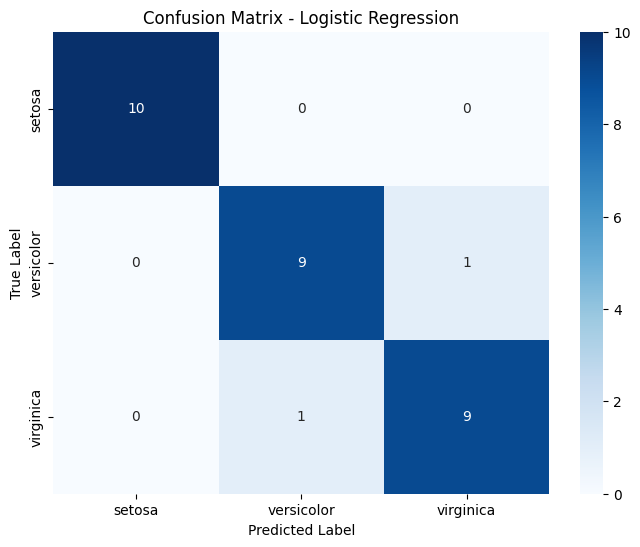


Decision Tree Results:
Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



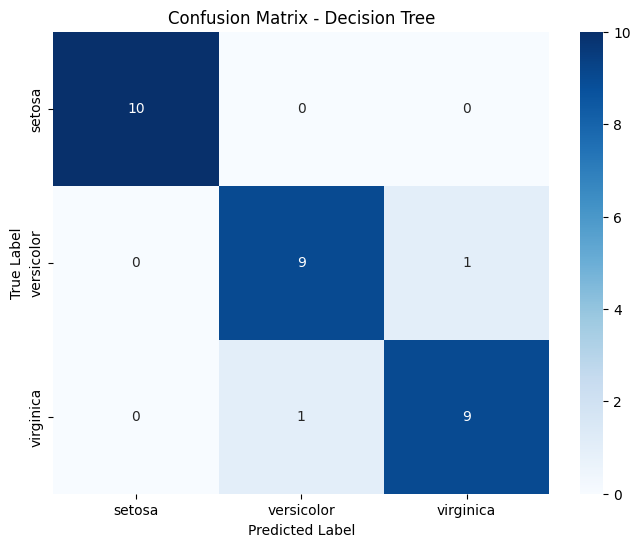


K-Nearest Neighbors Results:
Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



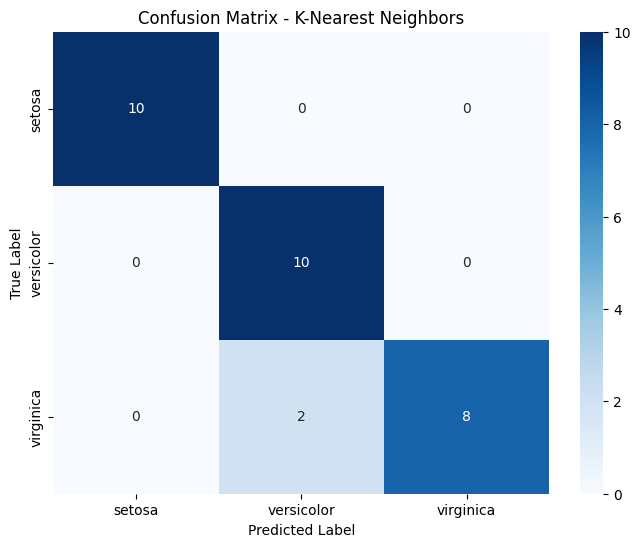

In [4]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train multiple models
models = {
'Logistic Regression': LogisticRegression(max_iter=200),
'Decision Tree': DecisionTreeClassifier(random_state=42),
'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=iris.target_names,
    yticklabels=iris.target_names)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


# Workshop: Model Evaluation Comparing Model Performance


Cross-Validation Results (5-fold):
Logistic Regression: 0.9583 (+/- 0.0527)
Decision Tree: 0.9417 (+/- 0.0408)
K-Nearest Neighbors: 0.9667 (+/- 0.0624)

Feature Importance (Decision Tree):
             feature  importance
2  petal length (cm)    0.558568
3   petal width (cm)    0.406015
1   sepal width (cm)    0.029167
0  sepal length (cm)    0.006250


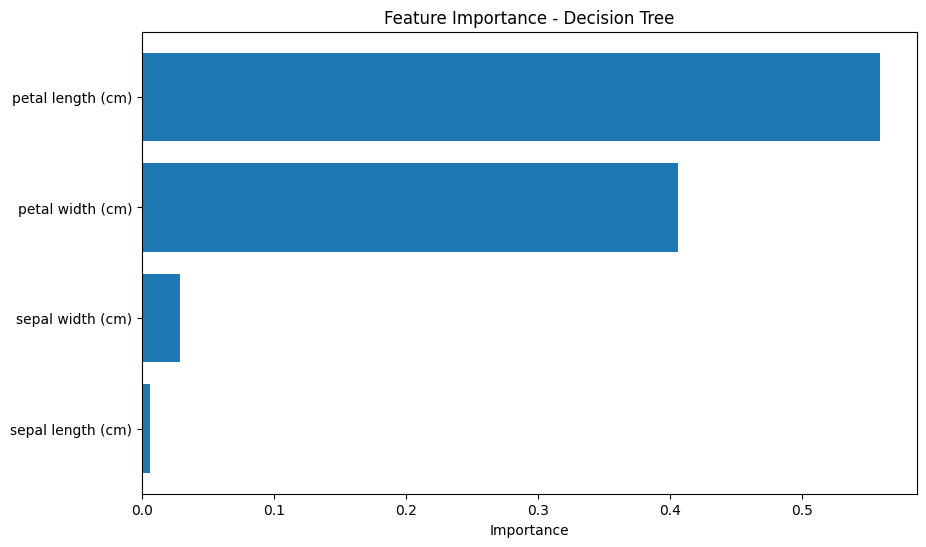

In [6]:
# Compare model performances
import plotly.graph_objects as go

# Create comparison visualization
fig = go.Figure(data=[go.Bar(name='Accuracy', x=list(results.keys()), y=list(results.values()))])
fig.update_layout(
title='Model Performance Comparison',
xaxis_title='Model',
yaxis_title='Accuracy',
yaxis=dict(range=[0, 1])
)
fig.show()

# Cross-validation for more robust evaluation
from sklearn.model_selection import cross_val_score
print("\nCross-Validation Results (5-fold):")
for name, model in models.items():
  scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
  print(f"{name}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Feature importance (for Decision Tree)
dt_model = models['Decision Tree']
feature_importance = pd.DataFrame({
'feature': X.columns,
'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature Importance (Decision Tree):")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()
plt.show()


# Week 1 Summary :

✅ Data Loading & Exploratory Data Analysis(EDA)

✅ Data Preprocessing

✅ Model Training

✅ Performance Evaluation
